In [1]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df = df.drop(['Country'], axis = 1)

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

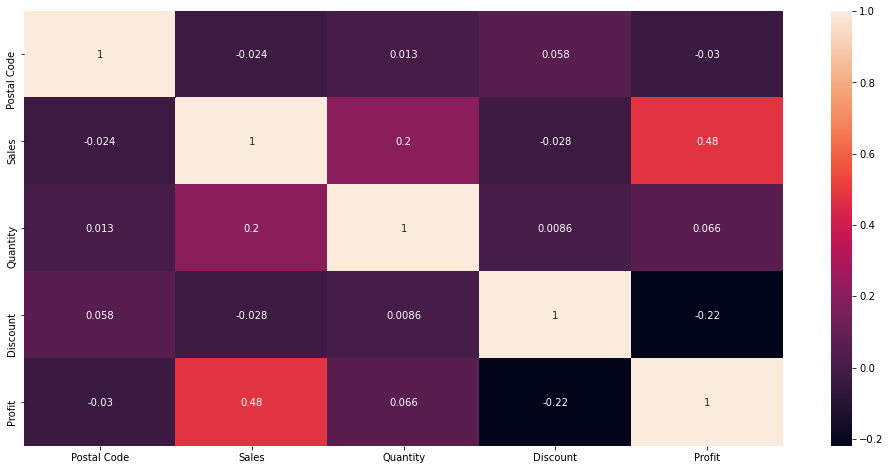

In [11]:
#checking for correlation
plt.figure(1, figsize = (17, 8))
cor = sns.heatmap(df.corr(), annot = True)

### Top Cities in Sales

In [12]:
top_cities= df['City'].value_counts().nlargest(10)
top_cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

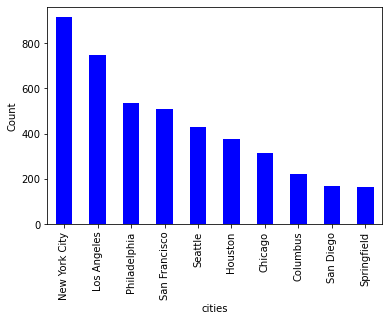

In [33]:
top_cities.plot(kind='bar', color='blue')
plt.ylabel('Count')
plt.xlabel('cities')
plt.show()

### Top States

In [14]:
top_states= df['State'].value_counts().nlargest(10)
top_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

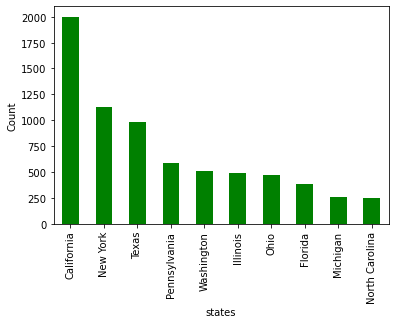

In [32]:
top_states.plot(kind='bar', color='green')
plt.ylabel('Count')
plt.xlabel('states')
plt.show()

### Different Regions

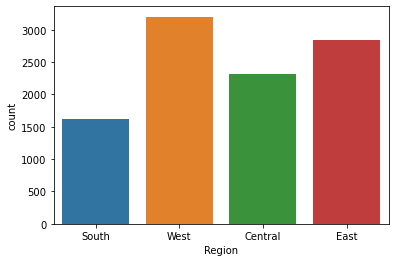

In [16]:
sns.countplot(x='Region',data=df)

In [17]:
category=df['Category'].unique()
print(category)

['Furniture' 'Office Supplies' 'Technology']


In [18]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### Different Categories

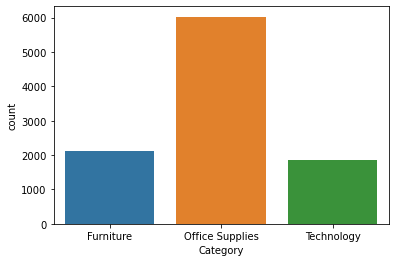

In [19]:
sns.countplot(x='Category',data=df)

### Distribution of Customer Segment

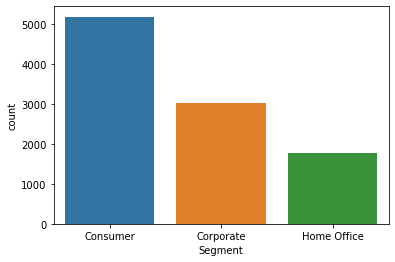

In [20]:
sns.countplot(x='Segment' ,data = df)

### Sub-Category Wise Sales

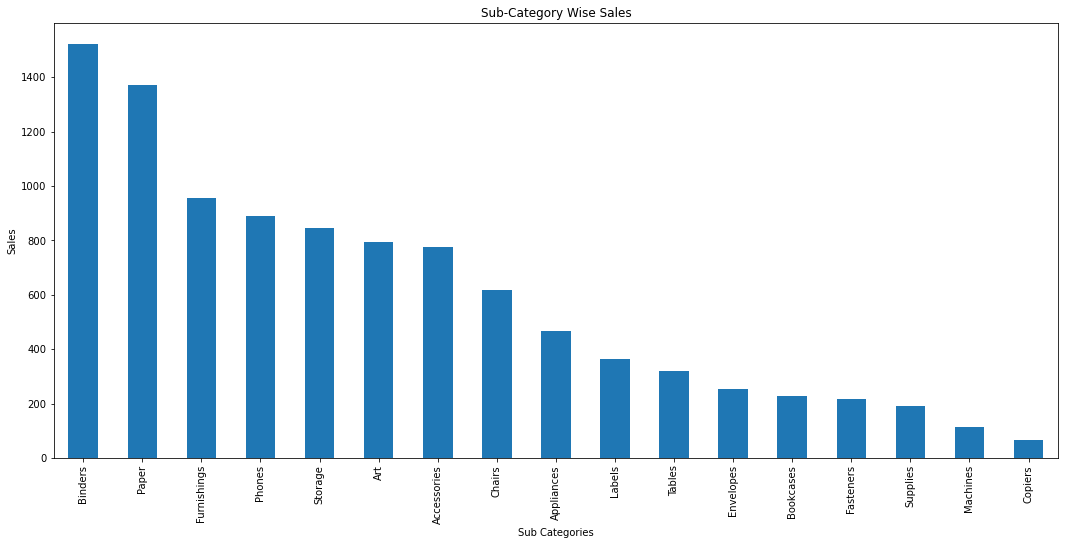

In [21]:
plt.figure(figsize=(18,8))
df['Sub-Category'].value_counts().plot.bar()
plt.title('Sub-Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Sub Categories')
plt.show()

### Visualizing the count of each sub-category

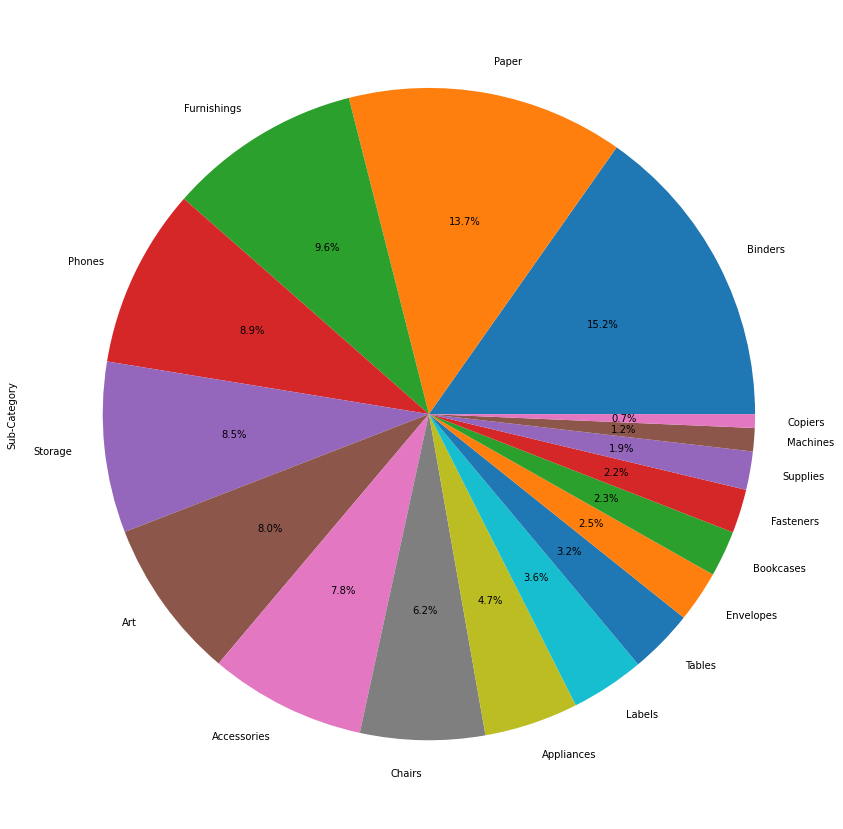

In [22]:
plt.figure(figsize=(15,15))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

### Visualising Ship Mode

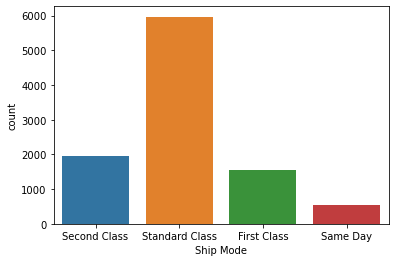

In [23]:
sns.countplot(x='Ship Mode' ,data = df)

### Analyzing the profit of sales

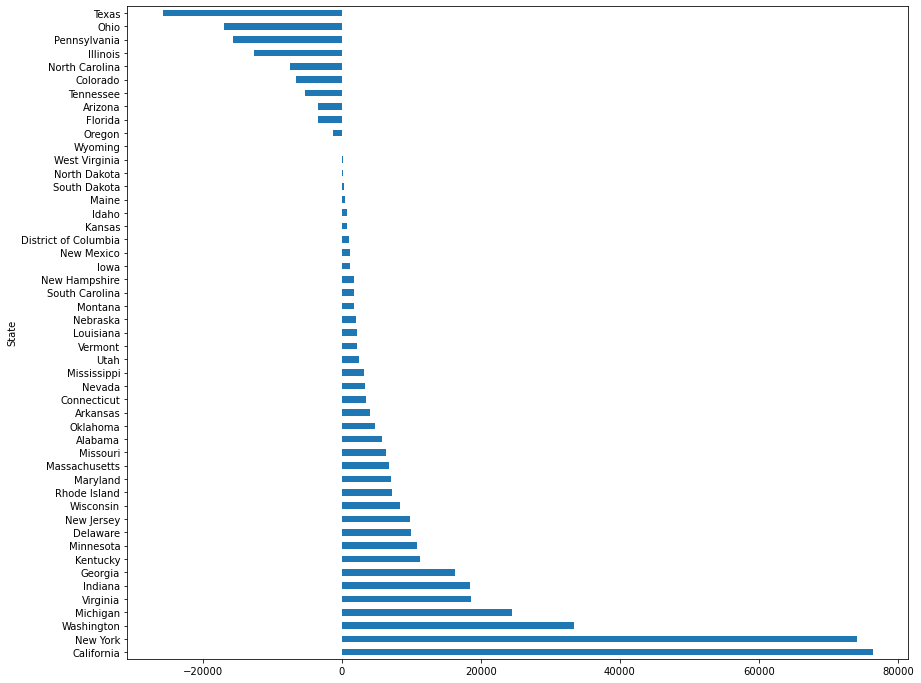

In [24]:
plt.figure(figsize=(14,12))
statewise=df.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

### Total Profit and Sales per Category

<ipython-input-25-b5593be34ddc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s=df.groupby('Sub-Category')['Profit','Sales'].sum()


<Figure size 1080x720 with 0 Axes>

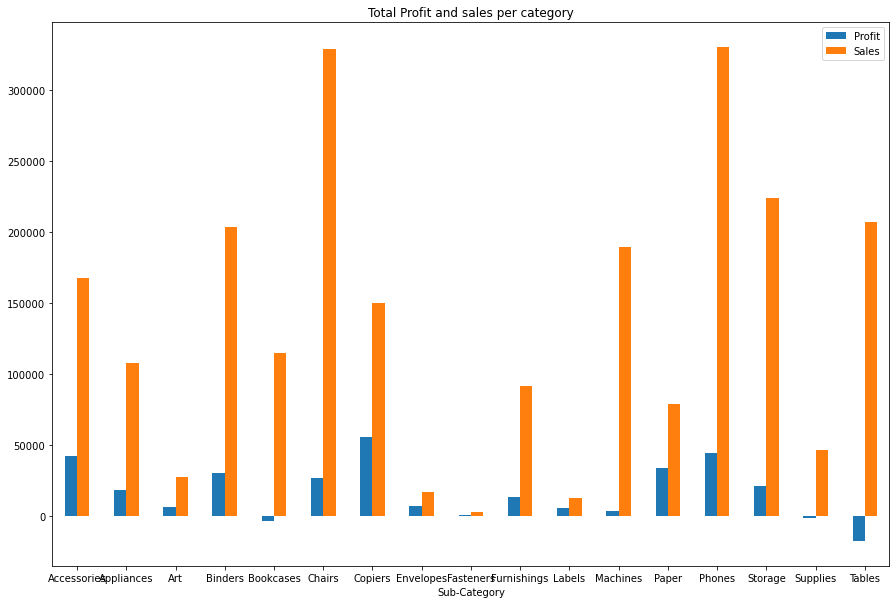

In [25]:
plt.figure(figsize=(15,10))
s=df.groupby('Sub-Category')['Profit','Sales'].sum()
s.plot.bar( rot=0,title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True)

### Visualizing Sales per Category

Text(0.5, 1.0, 'sales per category')

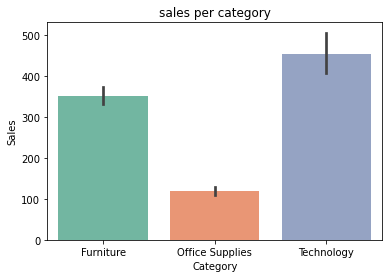

In [26]:
sns.barplot(x='Category',y='Sales',data=df,palette="Set2")
plt.title("sales per category")

# Insights:
1. office Supplies has wide variety.
2. Technology has highest sales as compared to other categories.
3. People prefer to use standard shipment mode as compared to other modes.
4. Consumer segment has highest count as compared to others.
5. Maximum Profit earned from states like california and newyork, whereas texas and chio gives more loss and products like phones and copiers give more profit , whereas Tables and bookcases are on loss.
6. People from west region shop more as compared to other regions